<a href="https://colab.research.google.com/github/Tihetna1891/SmartFraudDetection/blob/main/smart_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow

In [ ]:
pip install scikit-learn

In [ ]:
pip install mlflow

In [ ]:
pip install pandas

In [ ]:
pip install seaborn

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

# Load datasets
fraud_data = pd.read_csv('/content/drive/MyDrive/Data/Fraud_Data.csv')
ip_to_country = pd.read_csv('/content/drive/MyDrive/Data/IpAddress_to_Country.csv')
credit_card = pd.read_csv('/content/drive/MyDrive/Data/creditcard.csv')

# Check for missing values
print("Missing values in Fraud Data:")
print(fraud_data.isnull().sum())
print("\nMissing values in IP Address to Country Data:")
print(ip_to_country.isnull().sum())
print("\nMissing values in Credit Card Data:")
print(credit_card.isnull().sum())

# Example of handling missing values
# For numeric columns in fraud_data, impute missing values with the median
fraud_data.fillna(fraud_data.median(numeric_only=True), inplace=True)

# For categorical columns, fill missing with a placeholder, e.g., "Unknown"
fraud_data['source'].fillna("Unknown", inplace=True)
fraud_data['browser'].fillna("Unknown", inplace=True)


Missing values in Fraud Data:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

Missing values in IP Address to Country Data:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

Missing values in Credit Card Data:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


<ipython-input-4-26c4bd7e8b7d>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fraud_data['source'].fillna("Unknown", inplace=True)
<ipython-input-4-26c4bd7e8b7d>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [5]:
# Check for duplicates in Fraud Data and remove them
print("Duplicates in Fraud Data:", fraud_data.duplicated().sum())
fraud_data.drop_duplicates(inplace=True)

# Repeat for IP Address to Country Data
print("Duplicates in IP Address to Country Data:", ip_to_country.duplicated().sum())
ip_to_country.drop_duplicates(inplace=True)

# Repeat for Credit Card Data
print("Duplicates in Credit Card Data:", credit_card.duplicated().sum())
credit_card.drop_duplicates(inplace=True)


Duplicates in Fraud Data: 0
Duplicates in IP Address to Country Data: 0
Duplicates in Credit Card Data: 1081


In [6]:
# Convert signup_time and purchase_time to datetime
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Ensure numeric columns are correctly typed
fraud_data['purchase_value'] = pd.to_numeric(fraud_data['purchase_value'], errors='coerce')
fraud_data['age'] = pd.to_numeric(fraud_data['age'], errors='coerce')
credit_card['Amount'] = pd.to_numeric(credit_card['Amount'], errors='coerce')


             user_id                    signup_time  \
count  151112.000000                         151112   
mean   200171.040970  2015-04-20 00:56:09.511329280   
min         2.000000            2015-01-01 00:00:42   
25%    100642.500000     2015-02-18 09:52:48.500000   
50%    199958.000000            2015-04-19 04:41:30   
75%    300054.000000  2015-06-18 14:47:22.750000128   
max    400000.000000            2015-08-18 04:40:29   
std    115369.285024                            NaN   

                       purchase_time  purchase_value            age  \
count                         151112   151112.000000  151112.000000   
mean   2015-06-16 02:56:38.759952896       36.935372      33.140704   
min              2015-01-01 00:00:44        9.000000      18.000000   
25%       2015-04-18 14:41:25.500000       22.000000      27.000000   
50%       2015-06-18 13:46:17.500000       35.000000      33.000000   
75%       2015-08-17 18:48:31.500000       49.000000      39.000000   
max    

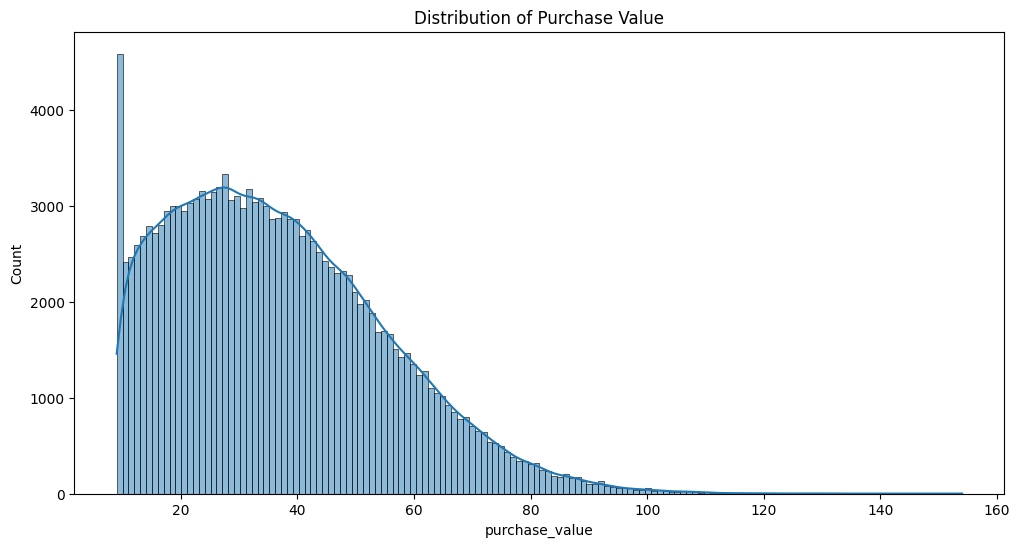

source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: int64
browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: int64
sex
M    88293
F    62819
Name: count, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(fraud_data.describe())
print(credit_card.describe())

# Plot distributions for key columns
plt.figure(figsize=(12, 6))
sns.histplot(fraud_data['purchase_value'], kde=True)
plt.title("Distribution of Purchase Value")
plt.show()

# Check distributions of categorical features
print(fraud_data['source'].value_counts())
print(fraud_data['browser'].value_counts())
print(fraud_data['sex'].value_counts())


In [8]:
# Identify columns that are not numeric
non_numeric_cols = fraud_data.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index(['signup_time', 'purchase_time', 'device_id', 'source', 'browser',
       'sex'],
      dtype='object')


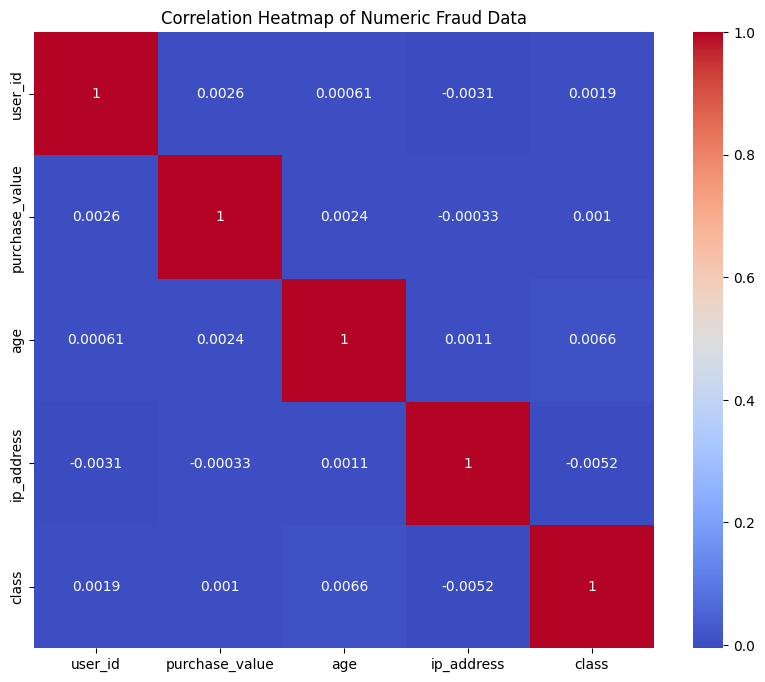

In [9]:
# Select only numeric columns for correlation analysis
numeric_fraud_data = fraud_data.select_dtypes(include=['float64', 'int64'])

# Perform correlation analysis on numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_fraud_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Fraud Data")
plt.show()


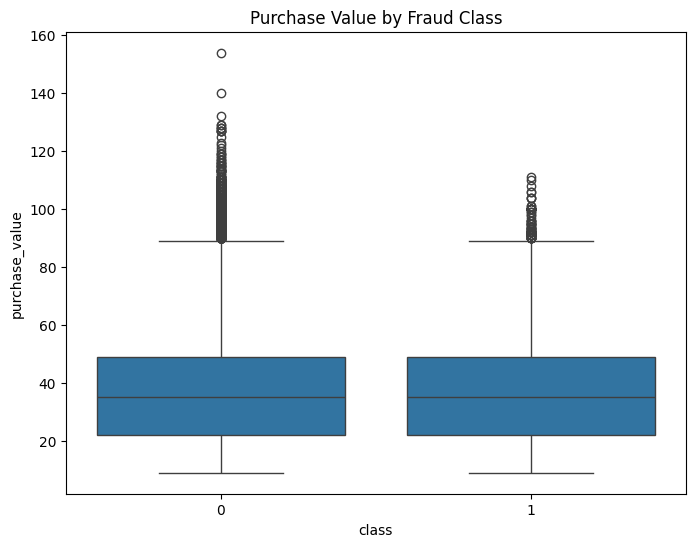

In [10]:
# Boxplot of purchase_value by fraud class, assuming class is numeric
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='purchase_value', data=fraud_data)
plt.title("Purchase Value by Fraud Class")
plt.show()


In [11]:
# Separate features and target in creditcard dataset
creditcard_features = credit_card.drop(columns=['Class'])
creditcard_target = credit_card['Class']

# Separate features and target in fraud_data dataset
fraud_data_features = fraud_data.drop(columns=['class'])
fraud_data_target = fraud_data['class']


In [12]:
from sklearn.model_selection import train_test_split

# Split creditcard data
X_train_cc, X_test_cc, y_train_cc, y_test_cc = train_test_split(
    creditcard_features, creditcard_target, test_size=0.2, random_state=42)

# Split fraud_data
X_train_fd, X_test_fd, y_train_fd, y_test_fd = train_test_split(
    fraud_data_features, fraud_data_target, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
mlp = MLPClassifier(max_iter=500, random_state=42)


In [14]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1


In [16]:
# Function to preprocess dataset and ensure all columns are numeric
def preprocess_dataset(X_train, X_test):
    # Convert non-numeric columns to numeric, coercing errors to NaN
    X_train = X_train.apply(pd.to_numeric, errors='coerce')
    X_test = X_test.apply(pd.to_numeric, errors='coerce')

    # Drop columns that contain NaN values (those that couldn't be converted)
    X_train = X_train.dropna(axis=1)
    X_test = X_test.dropna(axis=1)

    # Ensure train and test sets have the same columns after dropping
    X_train, X_test = X_train.align(X_test, join='inner', axis=1)

    return X_train, X_test

# Preprocess both datasets
datasets = [
    (preprocess_dataset(X_train_cc, X_test_cc), y_train_cc, y_test_cc),
    (preprocess_dataset(X_train_fd, X_test_fd), y_train_fd, y_test_fd)
]
models = [log_reg, decision_tree, random_forest, gradient_boosting, mlp]
# datasets = [(X_train_cc, X_test_cc, y_train_cc, y_test_cc), (X_train_fd, X_test_fd, y_train_fd, y_test_fd)]
dataset_names = ['Credit Card', 'Fraud Data']

# Iterate through models and datasets for evaluation
for model in models:
    print(f"Evaluating model: {model.__class__.__name__}")
    for i, ((X_train, X_test), y_train, y_test) in enumerate(datasets):
        accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
        print(f"{dataset_names[i]} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


Evaluating model: LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Credit Card - Accuracy: 0.9991, Precision: 0.8545, Recall: 0.5222, F1 Score: 0.6483


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fraud Data - Accuracy: 0.9057, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Evaluating model: DecisionTreeClassifier
Credit Card - Accuracy: 0.9990, Precision: 0.6667, Recall: 0.7111, F1 Score: 0.6882
Fraud Data - Accuracy: 0.9103, Precision: 0.5222, Recall: 0.5691, F1 Score: 0.5447
Evaluating model: RandomForestClassifier
Credit Card - Accuracy: 0.9995, Precision: 0.9706, Recall: 0.7333, F1 Score: 0.8354
Fraud Data - Accuracy: 0.9560, Precision: 0.9903, Recall: 0.5389, F1 Score: 0.6980
Evaluating model: GradientBoostingClassifier
Credit Card - Accuracy: 0.9993, Precision: 0.8906, Recall: 0.6333, F1 Score: 0.7403
Fraud Data - Accuracy: 0.9557, Precision: 0.9827, Recall: 0.5393, F1 Score: 0.6964
Evaluating model: MLPClassifier
Credit Card - Accuracy: 0.9983, Precision: 0.3750, Recall: 0.1000, F1 Score: 0.1579
Fraud Data - Accuracy: 0.9057, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.1/569.1 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.7 MB/s eta 0:00:00


In [18]:
import mlflow
import mlflow.sklearn

# Start an MLflow experiment
mlflow.set_experiment("Fraud Detection Experiment")

for model in models:
    with mlflow.start_run(run_name=model.__class__.__name__):
        # Log model parameters
        model_params = model.get_params() if hasattr(model, 'get_params') else {}
        mlflow.log_params(model_params)

        # Train and evaluate the model
        for i, ((X_train, X_test), y_train, y_test) in enumerate(datasets):
            # Train model on the current dataset
            model.fit(X_train, y_train)

            # Evaluate the model and capture metrics
            accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)

            # Log metrics for this dataset
            mlflow.log_metrics({
                f"{dataset_names[i]}_accuracy": accuracy,
                f"{dataset_names[i]}_precision": precision,
                f"{dataset_names[i]}_recall": recall,
                f"{dataset_names[i]}_f1": f1
            })

        # Log the trained model
        mlflow.sklearn.log_model(model, f"{model.__class__.__name__}_model")


2024/11/07 12:10:59 INFO mlflow.tracking.fluent: Experiment with name 'Fraud Detection Experiment' does not exist. Creating a new experiment.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the d

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Reshape data for Conv1D input (samples, timesteps, features)
# Add a third dimension to X_train and X_test
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Define the CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=64, validation_data=(X_test_cnn, y_test), verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8336 - loss: 2085535724077056.0000 - val_accuracy: 0.9057 - val_loss: 744007722336256.0000
Epoch 2/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8298 - loss: 761430726934528.0000 - val_accuracy: 0.9057 - val_loss: 595388365012992.0000
Epoch 3/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8297 - loss: 481630586142720.0000 - val_accuracy: 0.9057 - val_loss: 203859481853952.0000
Epoch 4/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8300 - loss: 312482291777536.0000 - val_accuracy: 0.0943 - val_loss: 222745577127936.0000
Epoch 5/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8294 - loss: 147414702882816.0000 - val_accuracy: 0.9057 - val_loss: 64775656570880.0000
Epoch 6/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8332 - loss: 84553502818304.0000 - val_accuracy: 0.9057 - val_loss: 52048976412672.0000
Epoch 7/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step 

In [21]:
from tensorflow.keras.layers import SimpleRNN
# Add a third dimension to X_train and X_test
X_train_rnn = np.expand_dims(X_train, axis=-1)
X_test_rnn = np.expand_dims(X_test, axis=-1)
# Define the RNN model
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Dense(1, activation='sigmoid')
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
rnn_history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test_rnn, y_test), verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8264 - loss: 657688140709888.0000 - val_accuracy: 0.9057 - val_loss: 10019646996480.0000
Epoch 2/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8320 - loss: 56087680122880.0000 - val_accuracy: 0.5157 - val_loss: 646249775104.0000
Epoch 3/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8287 - loss: 21344498483200.0000 - val_accuracy: 0.0943 - val_loss: 5881439191040.0000
Epoch 4/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8278 - loss: 10159033155584.0000 - val_accuracy: 0.9057 - val_loss: 2215642398720.0000
Epoch 5/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8315 - loss: 6332573286400.0000 - val_accuracy: 0.9057 - val_loss: 673558953984.0000
Epoch 6/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8301 - loss: 4544007241728.0000 - val_accuracy: 0.8782 - val_loss: 7709340160.0000
Epoch 7/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8353 

In [22]:
from tensorflow.keras.layers import LSTM
X_train_lstm = np.expand_dims(X_train, axis=-1)
X_test_lstm = np.expand_dims(X_test, axis=-1)
# Define the LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test_lstm, y_test), verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8257 - loss: 1150756493197312.0000 - val_accuracy: 0.9057 - val_loss: 34582216835072.0000
Epoch 2/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8321 - loss: 43904443351040.0000 - val_accuracy: 0.9057 - val_loss: 187600228843520.0000
Epoch 3/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8166 - loss: 128660140982272.0000 - val_accuracy: 0.9057 - val_loss: 16240657563648.0000
Epoch 4/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8345 - loss: 110443297243136.0000 - val_accuracy: 0.9057 - val_loss: 630074048512.0000
Epoch 5/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8023 - loss: 31825233707008.0000 - val_accuracy: 0.9057 - val_loss: 7893777645568.0000
Epoch 6/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7772 - loss: 87501762985984.0000 - val_accuracy: 0.9057 - val_loss: 173519749120.0000
Epoch 7/10
1889/1889 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accu

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, cm

# Evaluate CNN
cnn_results = evaluate_model(cnn_model, X_test, y_test)
print("CNN Results:", cnn_results)

# Evaluate RNN
rnn_results = evaluate_model(rnn_model, X_test, y_test)
print("RNN Results:", rnn_results)

# Evaluate LSTM
lstm_results = evaluate_model(lstm_model, X_test, y_test)
print("LSTM Results:", lstm_results)


945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CNN Results: (0.9057009562253913, 0.0, 0.0, 0.0, array([[27373,     0],
       [ 2850,     0]]))
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
RNN Results: (0.09429904377460874, 0.09429904377460874, 1.0, 0.17234602243521907, array([[    0, 27373],
       [    0,  2850]]))
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
LSTM Results: (0.9057009562253913, 0.0, 0.0, 0.0, array([[27373,     0],
       [ 2850,     0]]))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
